In [1]:
!pip install lime

  Using cached lime-0.2.0.1.tar.gz (275 kB)
     |████████████████████████████████| 13.9 MB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 313 kB 88.3 MB/s eta 0:00:01
     |████████████████████████████████| 220 kB 77.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 59.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 49.9 MB/s eta 0:00:01
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=f885ea55d2bab302dc1b2e52839b2acbfd69ab14d7fc7c81e1bc0d3c0136dea4
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os
from PIL import Image

images = []
labels = []
file_names = []  # Add this list to store file names

master_data_path = "/tf/trailanderror/CatvsDog/PetImages"

def load_images_from_folder(folder_path, label):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isdir(file_path):
            # If the item is a directory, recursively load images from it
            load_images_from_folder(file_path, filename)
        elif filename.lower().endswith(('png', 'jpg', 'jpeg')):
            # If the item is an image file, load it and add it to the images list
            try:
                img = Image.open(file_path)
                images.append(img)
                labels.append(label)
                file_names.append(filename)  # Store the file name in the list
            except Exception as e:
                print(f'Error loading image {file_path}: {str(e)}')
        else:
            print(f'Skipping non-image file: {file_path}')

# Iterate through folders in the master folder
for folder_name in os.listdir(master_data_path):
    folder_path = os.path.join(master_data_path, folder_name)
    if os.path.isdir(folder_path):
        # Load images, labels, and file names from the current folder
        load_images_from_folder(folder_path, folder_name)

print(f'Images loaded: {len(images)}')
print(f'Labels loaded: {len(labels)}')
print(f'File names loaded: {len(file_names)}')

Skipping non-image file: /tf/trailanderror/CatvsDog/PetImages/Cat/Thumbs.db
Error loading image /tf/trailanderror/CatvsDog/PetImages/Cat/666.jpg: cannot identify image file '/tf/trailanderror/CatvsDog/PetImages/Cat/666.jpg'


/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:850: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Skipping non-image file: /tf/trailanderror/CatvsDog/PetImages/Dog/Thumbs.db
Error loading image /tf/trailanderror/CatvsDog/PetImages/Dog/11702.jpg: cannot identify image file '/tf/trailanderror/CatvsDog/PetImages/Dog/11702.jpg'
Images loaded: 24998
Labels loaded: 24998
File names loaded: 24998


1745.jpg


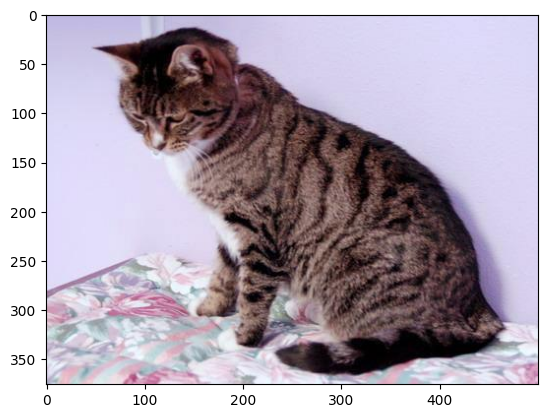

In [4]:
print(file_names[1])
plt.imshow(images[1])
plt.show()

In [5]:
# Convert PIL images to numpy arrays
numpy_images = [np.array(image) for image in images]

# Resize and convert images to RGB format if necessary
target_size = (224, 224)
reshaped_images = []
for idx, image in enumerate(numpy_images):
    pil_image = Image.fromarray(image)
    pil_image = pil_image.resize(target_size)
    # Convert to RGB if image is grayscale
    if pil_image.mode != 'RGB':
        pil_image = pil_image.convert('RGB')
    reshaped_images.append(np.array(pil_image))

# Shape of reshaped images
for idx, img in enumerate(reshaped_images):
    print(f'Image {idx+1} shape after resizing {img.shape}')
# Convert images to float32 and normalize to [0, 1]
normalized_images = np.array(reshaped_images, dtype=np.float32) / 255.0

# Verify the shape and data type of processed_images
print("Shape of normalized_images:", normalized_images.shape)
print("Data type of processed_images:", normalized_images.dtype)

Image 1 shape after resizing (224, 224, 3)
Image 2 shape after resizing (224, 224, 3)
Image 3 shape after resizing (224, 224, 3)
Image 4 shape after resizing (224, 224, 3)
Image 5 shape after resizing (224, 224, 3)
Image 6 shape after resizing (224, 224, 3)
Image 7 shape after resizing (224, 224, 3)
Image 8 shape after resizing (224, 224, 3)
Image 9 shape after resizing (224, 224, 3)
Image 10 shape after resizing (224, 224, 3)
Image 11 shape after resizing (224, 224, 3)
Image 12 shape after resizing (224, 224, 3)
Image 13 shape after resizing (224, 224, 3)
Image 14 shape after resizing (224, 224, 3)
Image 15 shape after resizing (224, 224, 3)
Image 16 shape after resizing (224, 224, 3)
Image 17 shape after resizing (224, 224, 3)
Image 18 shape after resizing (224, 224, 3)
Image 19 shape after resizing (224, 224, 3)
Image 20 shape after resizing (224, 224, 3)
Image 21 shape after resizing (224, 224, 3)
Image 22 shape after resizing (224, 224, 3)
Image 23 shape after resizing (224, 224, 

In [6]:
import os
from keras.models import load_model

# Define class labels and their corresponding encoded values
class_labels = ['Cat','Dog']
label_to_index = {class_label: index for index, class_label in enumerate(class_labels)}

# Load the pre-trained models
model_folder = '/tf/trailanderror/CatvsDog'  # Replace with the path to your model folder
model_files = os.listdir(model_folder)
loaded_models = {}

for model_file in model_files:
    try:
        model_name, extension = os.path.splitext(model_file)
        if extension == '.h5':
            model_path = os.path.join(model_folder, model_file)
            loaded_models[model_name] = load_model(model_path)
            print(f"Loaded model: {model_name}")
        else:
            print(f"Skipped file: {model_file} (not a valid model file)")
    except Exception as e:
        print(f"Error loading model {model_file}: {str(e)}")

print("Model loading completed.")

Loaded model: InceptionV3_model_FR
Skipped file: Cat vs Dog.zip (not a valid model file)
Skipped file: Lime Load codes-Copy1.ipynb (not a valid model file)
Loaded model: ResNet50_model_FR
Loaded model: VGG16_model_FR
Loaded model: VGG19_model_FR
Loaded model: MobileNetV2_model_FR
Skipped file: readme[1].txt (not a valid model file)
Skipped file: onehot_encoded_labels_fr.npy (not a valid model file)
Skipped file: MSR-LA - 3467.docx (not a valid model file)
Skipped file: .ipynb_checkpoints (not a valid model file)
Skipped file: Cat vs Dog (not a valid model file)
Loaded model: DenseNet121_model_FR
Skipped file: PetImages (not a valid model file)
Skipped file: Cat vs Dog.ipynb (not a valid model file)
Model loading completed.


Model Name: InceptionV3_model_FR
Image Name: 9890.jpg
1/1 [==============================] - 0s 96ms/step
Predicted Class Label: Cat


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 205ms/step


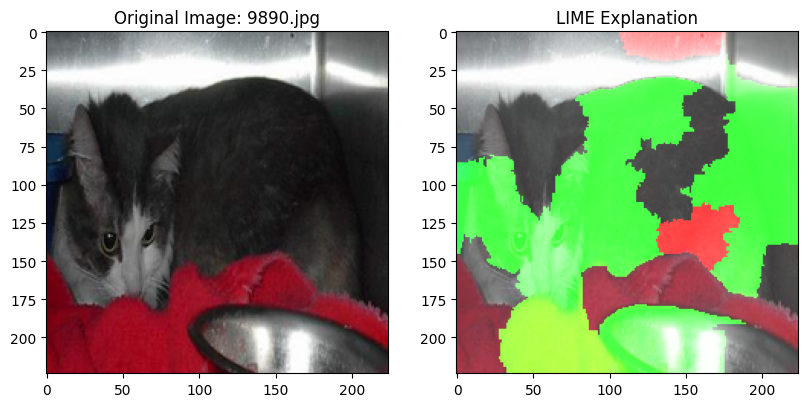

Predicted class: Cat
LIME Textual Explanation:  [[[0.3019608  0.32156864 0.33333334]
  [0.3019608  0.32156864 0.33333334]
  [0.29411766 0.3137255  0.3254902 ]
  ...
  [0.3254902  0.33333334 0.32941177]
  [0.32941177 0.3372549  0.33333334]
  [0.31764707 0.3254902  0.32156864]]

 [[0.31764707 0.3372549  0.34901962]
  [0.31764707 0.3372549  0.34901962]
  [0.3137255  0.33333334 0.34509805]
  ...
  [0.3254902  0.33333334 0.32941177]
  [0.32156864 0.32941177 0.3254902 ]
  [0.3137255  0.32156864 0.31764707]]

 [[0.32941177 0.34901962 0.36078432]
  [0.33333334 0.3529412  0.3647059 ]
  [0.3254902  0.34509805 0.35686275]
  ...
  [0.3254902  0.33333334 0.32941177]
  [0.3254902  0.33333334 0.32941177]
  [0.30980393 0.31764707 0.3137255 ]]

 ...

 [[0.54901963 0.01568628 0.07058824]
  [0.57254905 0.03137255 0.09411765]
  [0.58431375 0.03137255 0.09803922]
  ...
  [0.23529412 0.15294118 0.18039216]
  [0.24705882 0.16078432 0.1882353 ]
  [0.24705882 0.16078432 0.1882353 ]]

 [[0.54901963 0.01568628 0

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 217ms/step


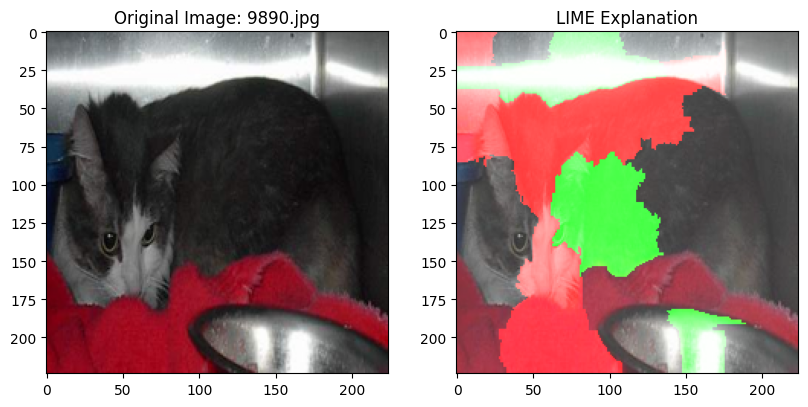

Predicted class: Cat
LIME Textual Explanation:  [[[1.         0.32156864 0.33333334]
  [1.         0.32156864 0.33333334]
  [1.         0.3137255  0.3254902 ]
  ...
  [0.3254902  0.33333334 0.32941177]
  [0.32941177 0.3372549  0.33333334]
  [0.31764707 0.3254902  0.32156864]]

 [[1.         0.3372549  0.34901962]
  [1.         0.3372549  0.34901962]
  [1.         0.33333334 0.34509805]
  ...
  [0.3254902  0.33333334 0.32941177]
  [0.32156864 0.32941177 0.3254902 ]
  [0.3137255  0.32156864 0.31764707]]

 [[1.         0.34901962 0.36078432]
  [1.         0.3529412  0.3647059 ]
  [1.         0.34509805 0.35686275]
  ...
  [0.3254902  0.33333334 0.32941177]
  [0.3254902  0.33333334 0.32941177]
  [0.30980393 0.31764707 0.3137255 ]]

 ...

 [[0.54901963 0.01568628 0.07058824]
  [0.57254905 0.03137255 0.09411765]
  [0.58431375 0.03137255 0.09803922]
  ...
  [0.23529412 0.15294118 0.18039216]
  [0.24705882 0.16078432 0.1882353 ]
  [0.24705882 0.16078432 0.1882353 ]]

 [[0.54901963 0.01568628 0

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 307ms/step


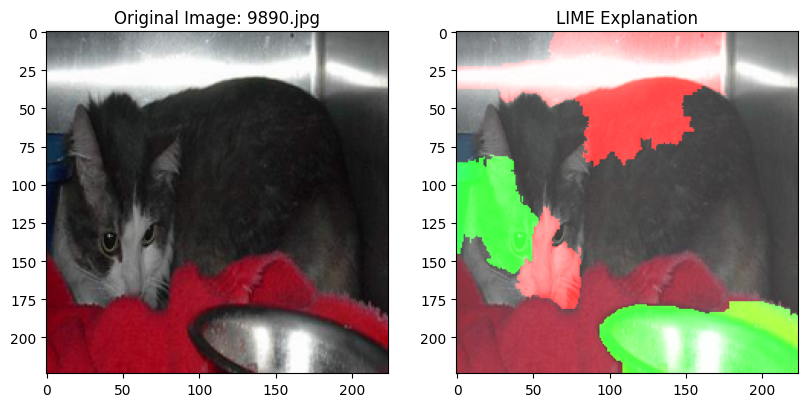

Predicted class: Cat
LIME Textual Explanation:  [[[0.3019608  0.32156864 0.33333334]
  [0.3019608  0.32156864 0.33333334]
  [0.29411766 0.3137255  0.3254902 ]
  ...
  [0.3254902  0.33333334 0.32941177]
  [0.32941177 0.3372549  0.33333334]
  [0.31764707 0.3254902  0.32156864]]

 [[0.31764707 0.3372549  0.34901962]
  [0.31764707 0.3372549  0.34901962]
  [0.3137255  0.33333334 0.34509805]
  ...
  [0.3254902  0.33333334 0.32941177]
  [0.32156864 0.32941177 0.3254902 ]
  [0.3137255  0.32156864 0.31764707]]

 [[0.32941177 0.34901962 0.36078432]
  [0.33333334 0.3529412  0.3647059 ]
  [0.3254902  0.34509805 0.35686275]
  ...
  [0.3254902  0.33333334 0.32941177]
  [0.3254902  0.33333334 0.32941177]
  [0.30980393 0.31764707 0.3137255 ]]

 ...

 [[0.54901963 0.01568628 0.07058824]
  [0.57254905 0.03137255 0.09411765]
  [0.58431375 0.03137255 0.09803922]
  ...
  [0.23529412 1.         0.18039216]
  [0.24705882 1.         0.1882353 ]
  [0.24705882 1.         0.1882353 ]]

 [[0.54901963 0.01568628 0

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 319ms/step


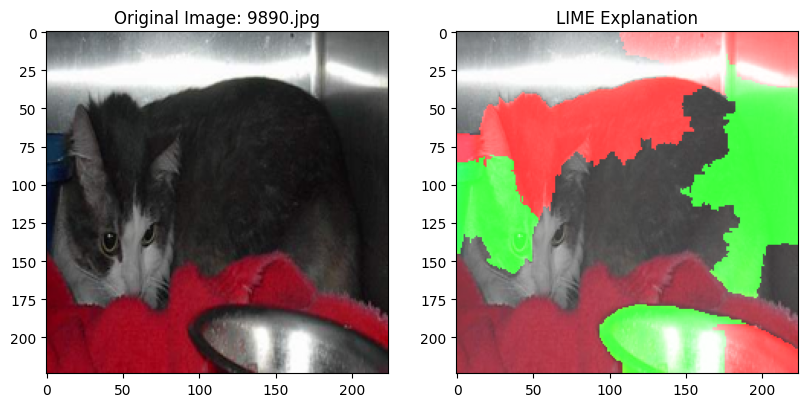

Predicted class: Cat
LIME Textual Explanation:  [[[0.3019608  0.32156864 0.33333334]
  [0.3019608  0.32156864 0.33333334]
  [0.29411766 0.3137255  0.3254902 ]
  ...
  [1.         0.33333334 0.32941177]
  [1.         0.3372549  0.33333334]
  [1.         0.3254902  0.32156864]]

 [[0.31764707 0.3372549  0.34901962]
  [0.31764707 0.3372549  0.34901962]
  [0.3137255  0.33333334 0.34509805]
  ...
  [1.         0.33333334 0.32941177]
  [1.         0.32941177 0.3254902 ]
  [1.         0.32156864 0.31764707]]

 [[0.32941177 0.34901962 0.36078432]
  [0.33333334 0.3529412  0.3647059 ]
  [0.3254902  0.34509805 0.35686275]
  ...
  [1.         0.33333334 0.32941177]
  [1.         0.33333334 0.32941177]
  [1.         0.31764707 0.3137255 ]]

 ...

 [[0.54901963 0.01568628 0.07058824]
  [0.57254905 0.03137255 0.09411765]
  [0.58431375 0.03137255 0.09803922]
  ...
  [1.         0.15294118 0.18039216]
  [1.         0.16078432 0.1882353 ]
  [1.         0.16078432 0.1882353 ]]

 [[0.54901963 0.01568628 0

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 149ms/step


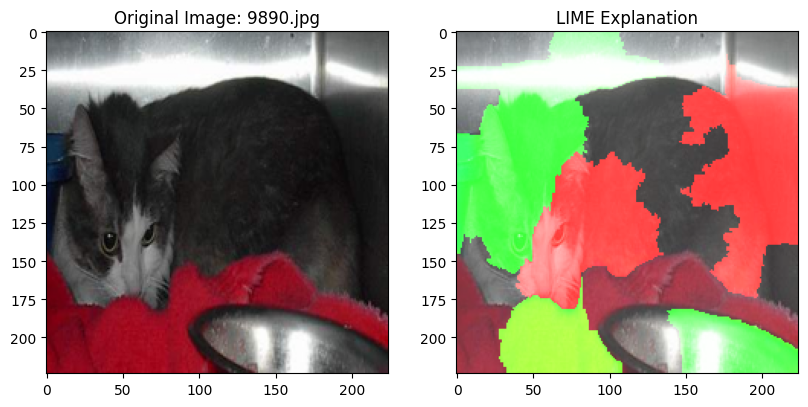

Predicted class: Cat
LIME Textual Explanation:  [[[0.3019608  0.32156864 0.33333334]
  [0.3019608  0.32156864 0.33333334]
  [0.29411766 0.3137255  0.3254902 ]
  ...
  [0.3254902  0.33333334 0.32941177]
  [0.32941177 0.3372549  0.33333334]
  [0.31764707 0.3254902  0.32156864]]

 [[0.31764707 0.3372549  0.34901962]
  [0.31764707 0.3372549  0.34901962]
  [0.3137255  0.33333334 0.34509805]
  ...
  [0.3254902  0.33333334 0.32941177]
  [0.32156864 0.32941177 0.3254902 ]
  [0.3137255  0.32156864 0.31764707]]

 [[0.32941177 0.34901962 0.36078432]
  [0.33333334 0.3529412  0.3647059 ]
  [0.3254902  0.34509805 0.35686275]
  ...
  [0.3254902  0.33333334 0.32941177]
  [0.3254902  0.33333334 0.32941177]
  [0.30980393 0.31764707 0.3137255 ]]

 ...

 [[0.54901963 0.01568628 0.07058824]
  [0.57254905 0.03137255 0.09411765]
  [0.58431375 0.03137255 0.09803922]
  ...
  [0.23529412 1.         0.18039216]
  [0.24705882 1.         0.1882353 ]
  [0.24705882 1.         0.1882353 ]]

 [[0.54901963 0.01568628 0

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 393ms/step


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from lime.lime_image import LimeImageExplainer

# Redirect stdout to os.devnull to hide the logs
#original_stdout = sys.stdout
#sys.stdout = open(os.devnull, 'w')

# Function to generate textual explanation using LIME
def generate_textual_explanation(img_array, model, explainer):
    explanation_instance = explainer.explain_instance(img_array, model.predict, top_labels=1, hide_color=0, num_samples=100)
    explanation_text = explanation_instance.get_image_and_mask(explanation_instance.top_labels[0], positive_only=False, num_features=10, hide_rest=False)[0]
    return explanation_text

# Loop through each image and model to generate explanations and Grad-CAM visualizations
for img_array, file_name in zip(normalized_images[:4], file_names[:4]):
    for model_name, model in loaded_models.items():
        print(f"Model Name: {model_name}")  # Print the model name
        print(f"Image Name: {file_name}")

        # Get model predictions for the input image
        predictions = model.predict(np.expand_dims(img_array, axis=0))

        # Get the predicted class label using the label encoder
        predicted_indices = np.argmax(predictions, axis=1)
        predicted_class_label = class_labels[predicted_indices[0]]
        print(f"Predicted Class Label: {predicted_class_label}")  # Print the predicted class label

        explanation = f"Predicted class: {predicted_class_label}"

        # Generate LIME explanation as textual explanation
        explainer = LimeImageExplainer()
        explanation_text = generate_textual_explanation(img_array, model, explainer)
        
        # Upsample the heatmap to match the original image size
        heatmap_upsampled = tf.image.resize(grad_cam, (img_array.shape[1], img_array.shape[0]))
        heatmap_upsampled = heatmap_upsampled[:, :, 0]

        # Plot the original image, LIME explanation, and Grad-CAM visualization
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(img_array)
        plt.title(f"Original Image: {file_name}")
        plt.subplot(1, 3, 2)
        plt.imshow(explanation_text, cmap='jet', alpha=0.8)
        plt.title("LIME Explanation")
        plt.show()

        print(explanation)
        print("LIME Textual Explanation: ", explanation_text)

# Shap -XAI

In [ ]:
!pip install --upgrade shap

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import shap

In [ ]:
import shap

def generate_shap_explanation(img_array, model, background_data):
    # Create a DeepExplainer object using the SHAP library with background data
    explainer = shap.DeepExplainer(model, background_data)

    # Calculate SHAP values for the input image
    shap_values = explainer.shap_values(img_array)

    # Get the SHAP values for the predicted class
    shap_values_class = shap_values[0]

    # Calculate the importance of each pixel in the image
    importance_map = np.abs(shap_values_class).max(axis=-1)

    return importance_map

## Shap requires semantic mask to proceed further so droping the project with Classification model and LIME alone.

**** THE END  ****